In [1]:
import os
import pandas as pd

folder_path = "./datasets/kaggle/Titanic"
gender_filename = "gender_submission.csv"
train_filename = "train.csv"
test_filename = "test.csv"

gender_file = os.path.join(folder_path, gender_filename) 
train_file = os.path.join(folder_path, train_filename)
test_file = os.path.join(folder_path, test_filename)

gender = pd.read_csv(gender_file)
train_set = pd.read_csv(train_file)
test_set = pd.read_csv(test_file)

In [2]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [3]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


In [5]:
train_set.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


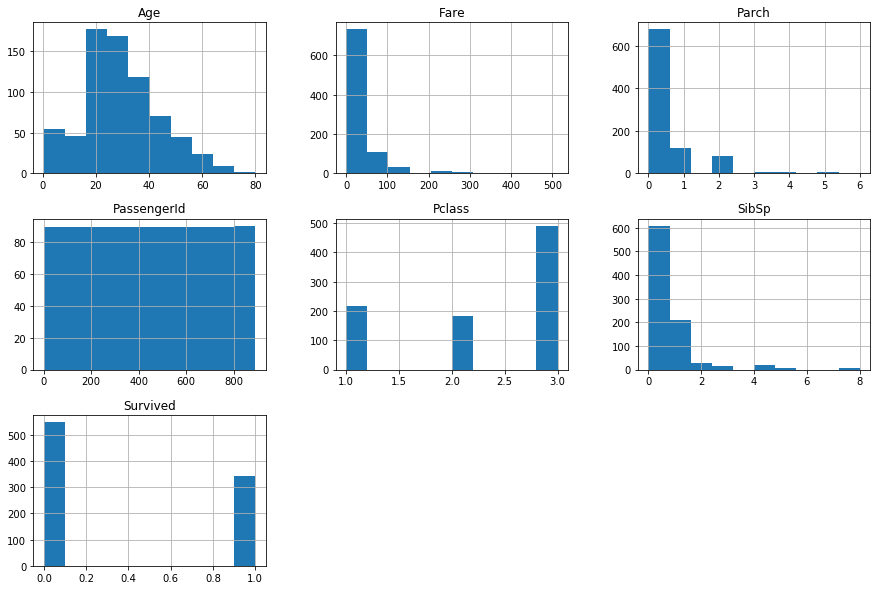

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

train_set.hist(figsize=(15, 10))
plt.show()

In [16]:
train_set["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
corr_matrix = train_set.corr()
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [19]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

C:\Users\youcaiSUN\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F99E390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000011D4A358>]], dtype=object)

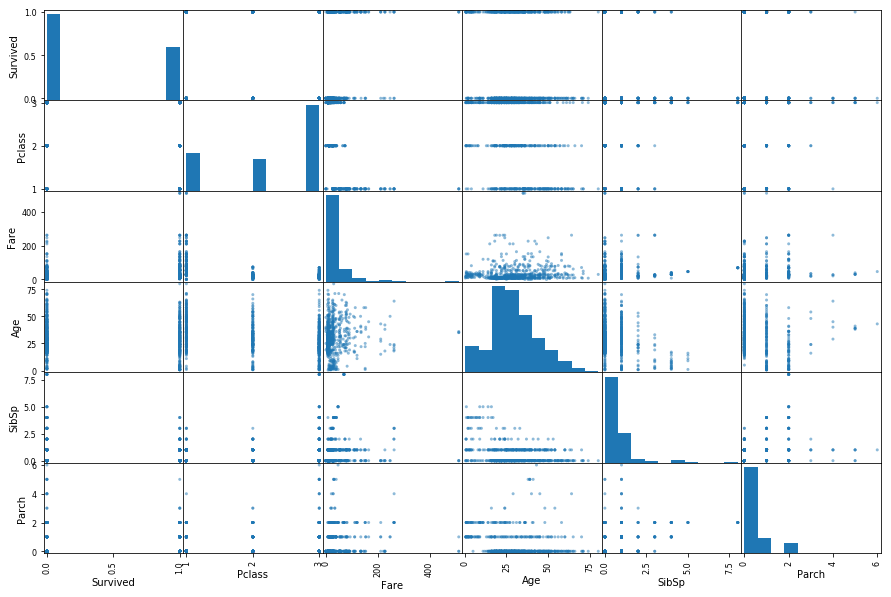

In [23]:
from pandas.tools.plotting import scatter_matrix

attributes = ["Survived", "Pclass", "Fare", "Age", "SibSp", "Parch", "Sex"]
scatter_matrix(train_set[attributes], figsize=(15,10))

In [24]:
women_survived_cnt = 0
for i in range(train_set.shape[0]):
    if train_set["Survived"].iloc[i] == 1 and train_set["Sex"].iloc[i] == "female":
        women_survived_cnt += 1
women_survived_cnt

233

In [32]:
survived_cnt = train_set["Survived"].value_counts()
survived_cnt

0    549
1    342
Name: Survived, dtype: int64

In [34]:
women_cnt = train_set["Sex"].value_counts()
women_cnt["female"]

314

In [38]:
print("women ratio in survived: %.2f" % (women_survived_cnt / 342))
print("survived ratio in women: %.2f" % (women_survived_cnt / 314))

women ratio in survived: 0.68
survived ratio in women: 0.74


# 3. Prepare the data for ML algorithm

In [48]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelBinarizer

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

In [86]:
numerical_attributes = [ "Age", "SibSp", "Parch", "Fare"]
categorical_attributes_1 = ["Pclass"]
categorical_attributes_2 = ["Sex"]
categorical_attributes_3 = ["Embarked"] # "Embarked" need to be taken care of in the future

In [87]:
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion

numerical_pipeline = Pipeline([
    ("selector", DataFrameSelector(numerical_attributes)),
    ("imputer", Imputer(strategy="median")),
    ("scaler", StandardScaler()),
])

categorical_pipeline_1 = Pipeline([
    ("selector", DataFrameSelector(categorical_attributes_1)),
    ("lablel_binarizer", MyLabelBinarizer()),
])
categorical_pipeline_2 = Pipeline([
    ("selector", DataFrameSelector(categorical_attributes_2)),
    ("lablel_binarizer", MyLabelBinarizer()),
])

full_pipeline = FeatureUnion(transformer_list=[
    ("numerical_pipeline", numerical_pipeline),
    ("categorical_pipeline_1", categorical_pipeline_1),
    ("categorical_pipeline_2", categorical_pipeline_2),
])

In [105]:
titanic_prepared = full_pipeline.fit_transform(train_set)
titanic_labels = train_set["Survived"].copy() 
'''
traget_attr = ["Survived"]
train_set[target_attr].copy()
Do not work for cross_val_score 
'''

# 4. Select a model and train it

In [95]:
from sklearn.linear_model import LogisticRegression

logis_reg = LogisticRegression(random_state=42)
logis_reg.fit(titanic_prepared, titanic_labels)
lr_predictions = logis_reg.predict(titanic_prepared)

C:\Users\youcaiSUN\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [96]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(lr_predictions, titanic_labels)
print("Train accuracy: %.2f" % train_accuracy)

Train accuracy: 0.80


In [107]:
from sklearn.model_selection import cross_val_score

logis_reg = LogisticRegression(random_state=42)
train_accuracys = cross_val_score(logis_reg, titanic_prepared, titanic_labels, scoring="accuracy", cv=5, verbose=True)

train_accuracys

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


array([ 0.7877095 ,  0.78212291,  0.78089888,  0.75842697,  0.83050847])

In [100]:
titanic_prepared.shape

(891, 8)

In [106]:
titanic_labels.shape

(891,)